In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal, eigh
from scipy.sparse import spdiags

In [37]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman"
})

## COMPLEMENTARY COMPUTATION

In [38]:
N = 21
ns = np.linspace(-10, 10, 21)

In [39]:
def ng(n, n_g):
    return (n + n_g)**2

In [40]:
ngs = np.linspace(-1, 1, 400)
first = []
second = []
third = []

for n_g in ngs:
    d = 4 * ng(ns, n_g)
    e = -1 / 2 * np.ones(len(d)-1)
    w, v = eigh_tridiagonal(d, e)
    first.append([w[0]])
    second.append([w[1]])
    third.append([w[2]])

for n_g in ngs:
    d = 4 * ng(ns, n_g)
    e = -5 / 2 * np.ones(len(d)-1)
    w, v = eigh_tridiagonal(d, e)
    first.append([w[0]])
    second.append([w[1]])
    third.append([w[2]])

for n_g in ngs:
    d = 4 * ng(ns, n_g)
    e = -10 / 2 * np.ones(len(d)-1)
    w, v = eigh_tridiagonal(d, e)
    first.append([w[0]])
    second.append([w[1]])
    third.append([w[2]])

for n_g in ngs:
    d = 4 * ng(ns, n_g)
    e = -50 / 2 * np.ones(len(d)-1)
    w, v = eigh_tridiagonal(d, e)
    first.append([w[0]])
    second.append([w[1]])
    third.append([w[2]])

In [41]:
first = np.array(first)
second = np.array(second)
third = np.array(third)

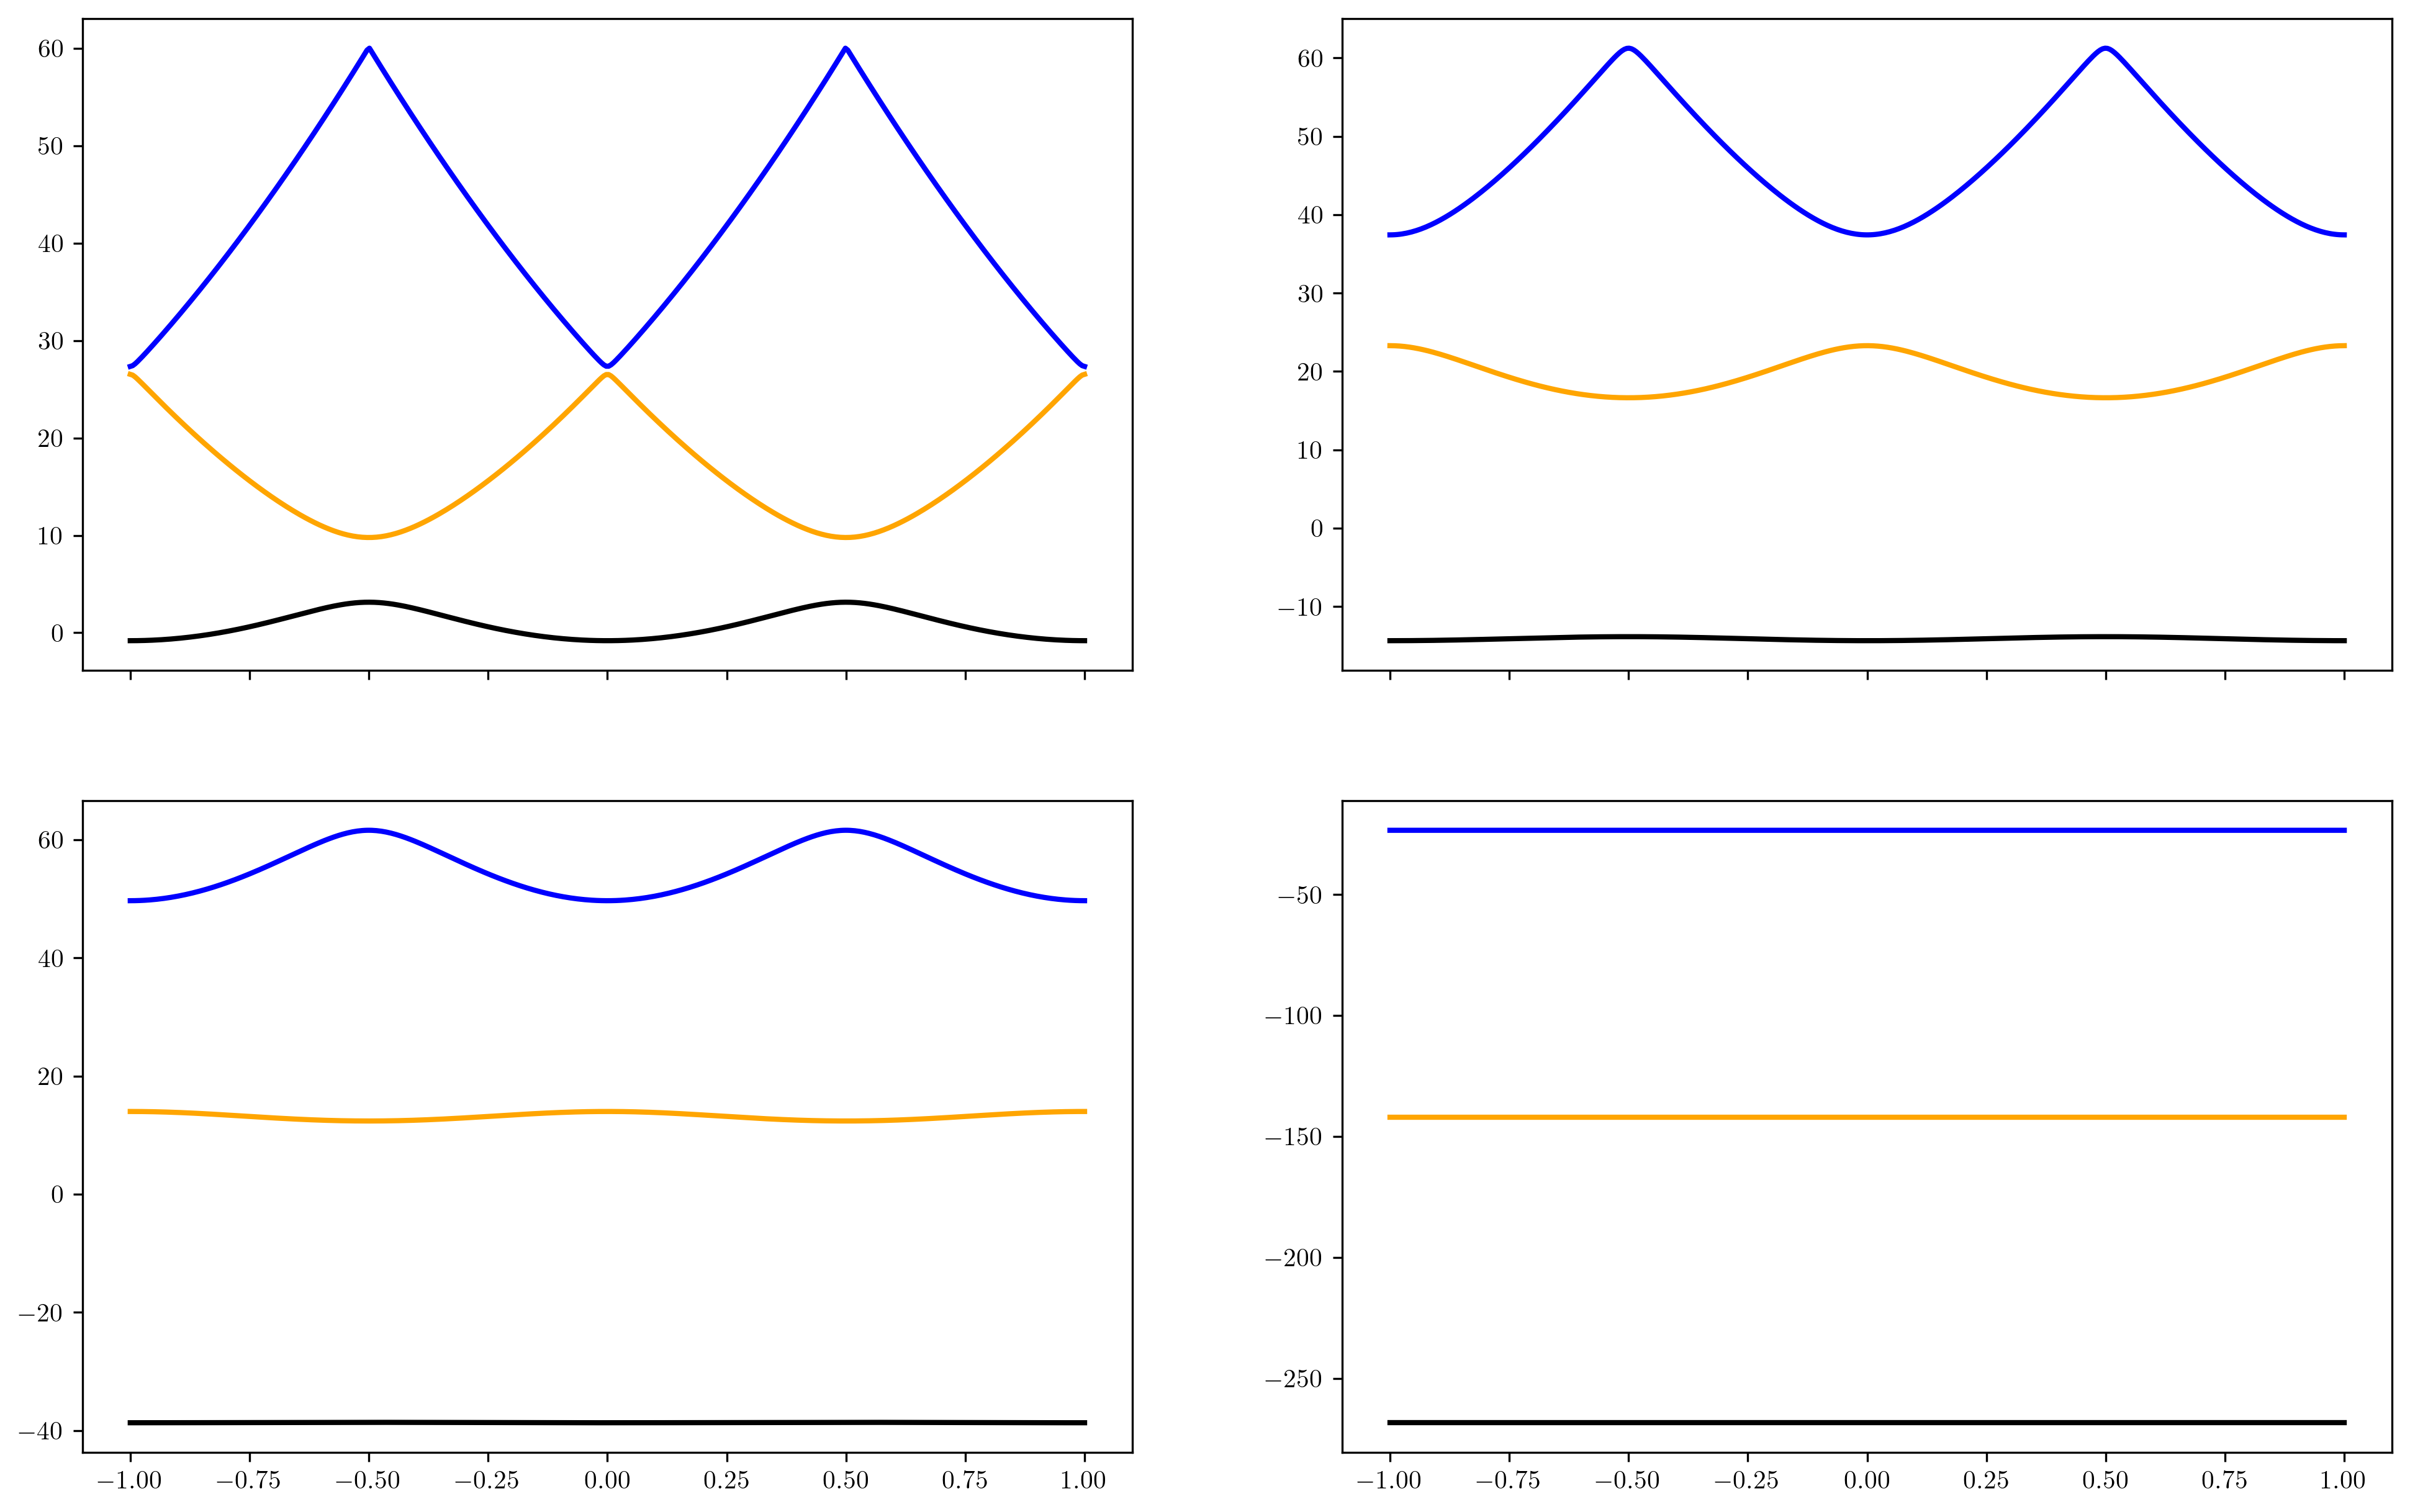

In [42]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10), dpi = 300, sharex = True)

for ind in range(4):
    plotable = ax[ind // 2][ind % 2]
    plotable.plot(ngs, first[400 * ind : 400 * (ind + 1)] / (0.6 / 4), color='black', lw=2)
    plotable.plot(ngs, second[400 * ind : 400 * (ind + 1)] / (0.6 / 4), color='orange', lw=2)
    plotable.plot(ngs, third[400 * ind : 400 * (ind + 1)] / (0.6 / 4), color='blue', lw=2)

plt.show()

## MAIN PART

In [43]:
# Introducing element's parameters
EJ1 = 22
alpha = 0.25
EJ2 = alpha * EJ1
EC_4 = 0.6

L = 21 # count of charge states
ns = np.linspace(-10, 10, L) # eigenvalues of charge states

Having hamiltonian of the system

$$
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
$$

$$
\begin{gathered}
\hat{H} = 4E_Cn^2\ket{n, n_{\alpha}}\bra{n, n_{\alpha}} - \frac{E_{J1}}{2}(\ket{n, n_{\alpha}}\bra{n + 1, n_{\alpha}} + \ket{n + 1, n_{\alpha}}\bra{n, n_{\alpha}}) - \frac{E_{J2}}{2}(e^{i\varphi_{e2}}\ket{n, n_{\alpha}}\bra{n + 1, n_{\alpha}} + e^{-i\varphi_{e2}}\ket{n + 1, n_{\alpha}}\bra{n, n_{\alpha}})
\end{gathered}
$$

we can translate it into the three-diagonal matrix representation

$$
\begin{pmatrix}
4E_C \cdot 121 & -(E_{J1} + E_{J2}e^{i\varphi_{e2}})/2 & 0 & 0 & ... & 0 \\
-(E_{J1} + E_{J2}e^{-i\varphi_{e2}})/2 & 4E_C \cdot 100 & -(E_{J1} + E_{J2}e^{i\varphi_{e2}})/2 & 0 & ... & 0 \\
0 & -(E_{J1} + E_{J2}e^{-i\varphi_{e2}})/2 & 4E_C \cdot 81 & -(E_{J1} + E_{J2}e^{i\varphi_{e2}})/2 & ... & 0 \\
... & ... & ... & ... & ... & ... \\
0 & 0 & ... & -(E_{J1} + E_{J2}e^{-i\varphi_{e2}})/2 & 4E_C \cdot 100 & -(E_{J1} + E_{J2}e^{i\varphi_{e2}})/2 \\
0 & 0 & ... & 0 & -(E_{J1} + E_{J2}e^{-i\varphi_{e2}})/2 & 4E_C \cdot 121
\end{pmatrix}
$$

In [44]:
phis_2 = np.linspace(0, np.pi * 2, 400) # scanning values for external flux 2

# energy eigenvalues
first = np.ndarray(400)
second = np.ndarray(400)
third = np.ndarray(400)

# transition energy between corresponding energy levels
way_01 = np.ndarray(400)
way_12 = np.ndarray(400)
way_23 = np.ndarray(400)

for j in range(0, 400):
    # external flux
    phi_e2 = phis_2[j]
    
    diagonals = np.zeros((3, L), dtype = 'complex_')

    # main diagonal of the matrix above
    diagonals[1] = EC_4 * ns**2

    # low and top diags of the matrix above
    diagonals[0, :] = -(EJ1 + EJ2 * np.exp(-1j * phi_e2)) / 2
    diagonals[2, :] = -(EJ1 + EJ2 * np.exp(1j * phi_e2)) / 2
    
    res_sp = spdiags(diagonals, [-1, 0, 1], L, L).toarray()

    # getting eigenvalues and eigenvectors of the matrix above
    w, v = eigh(res_sp)

    # getting energy eigenvalues of 1,2,3 levels respectively
    first[j] = w[0]
    second[j] = w[1]
    third[j] = w[2]

    # getting transition energy
    way_01[j] = np.abs(w[0] - w[1])
    way_12[j] = np.abs(w[1] - w[2])
    way_23[j] = np.abs(w[2] - w[3])

# Lets plot energy spectrum

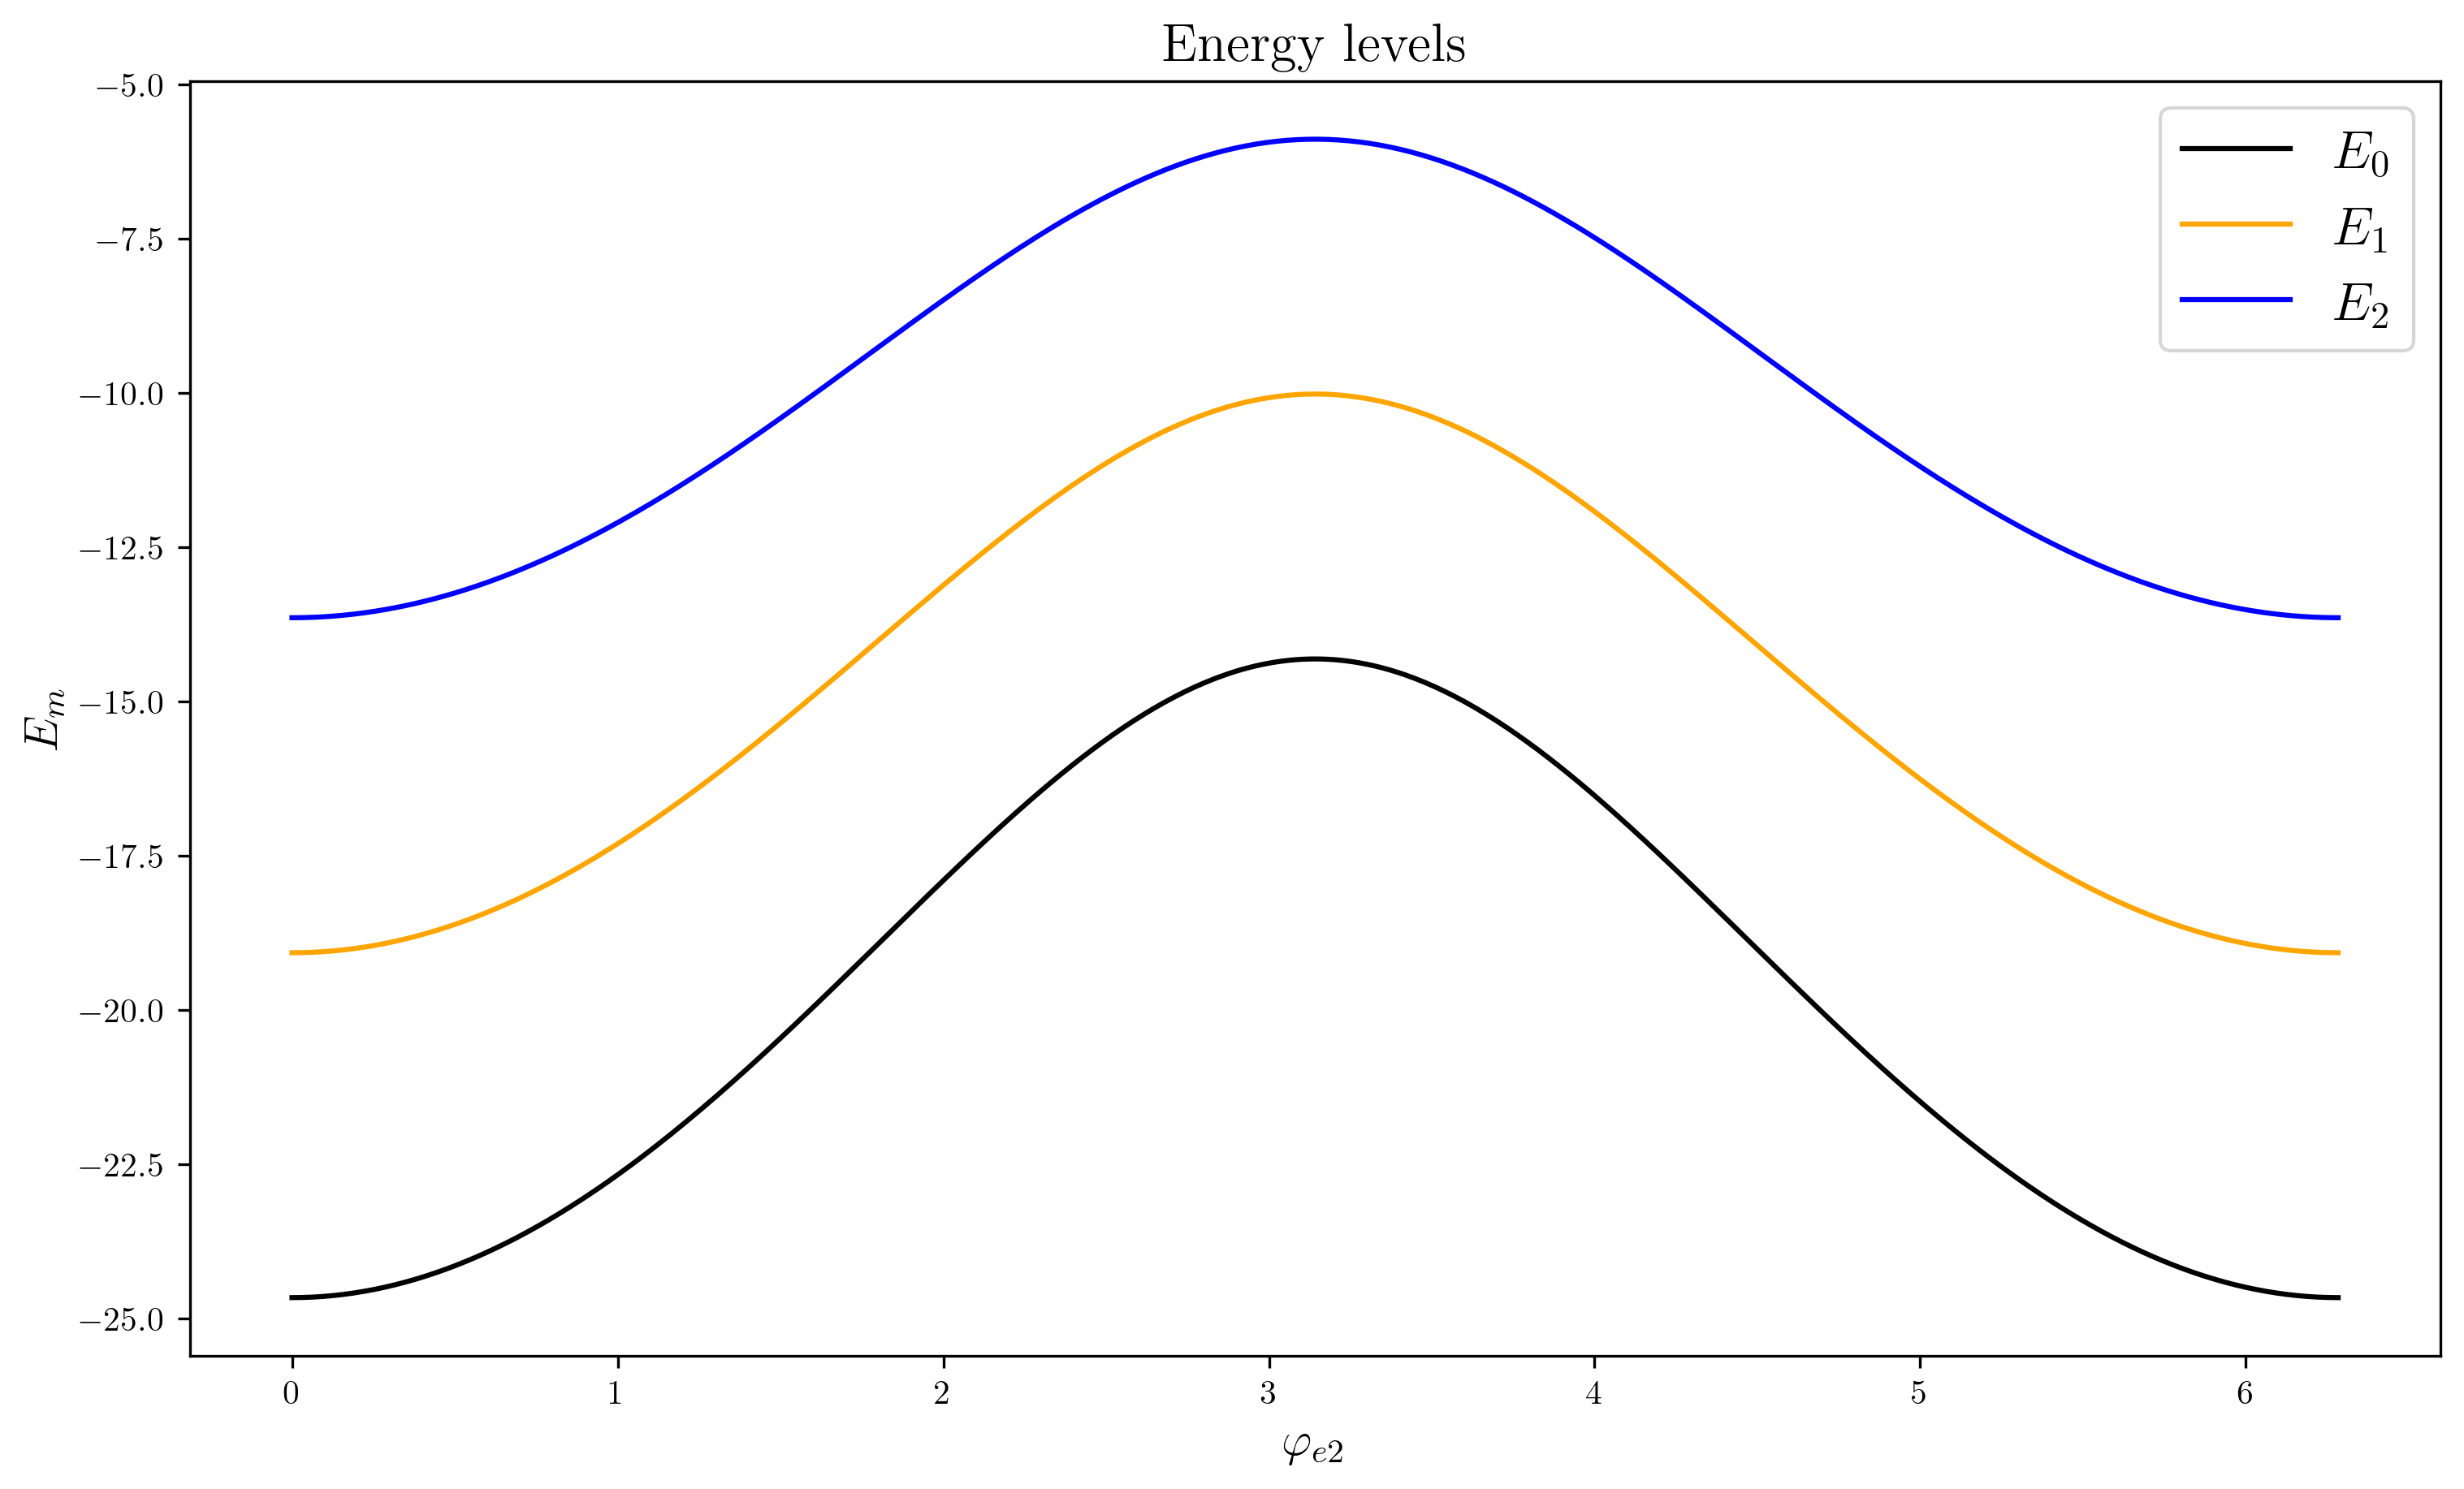

In [45]:
fig = plt.figure(figsize=(10, 6), layout='constrained', dpi=300)

plt.plot(phis_2, first, color='black', label="$E_0$")
plt.plot(phis_2, second, color='orange', label="$E_1$")
plt.plot(phis_2, third, color='blue', label="$E_2$")

plt.xlabel("$\\varphi_{e2}$", fontsize=14)
plt.ylabel("$E_m$", fontsize=14)
plt.title("Energy levels", fontsize=16)

plt.legend(fontsize=16)

plt.show()

# Lets plot transition energies

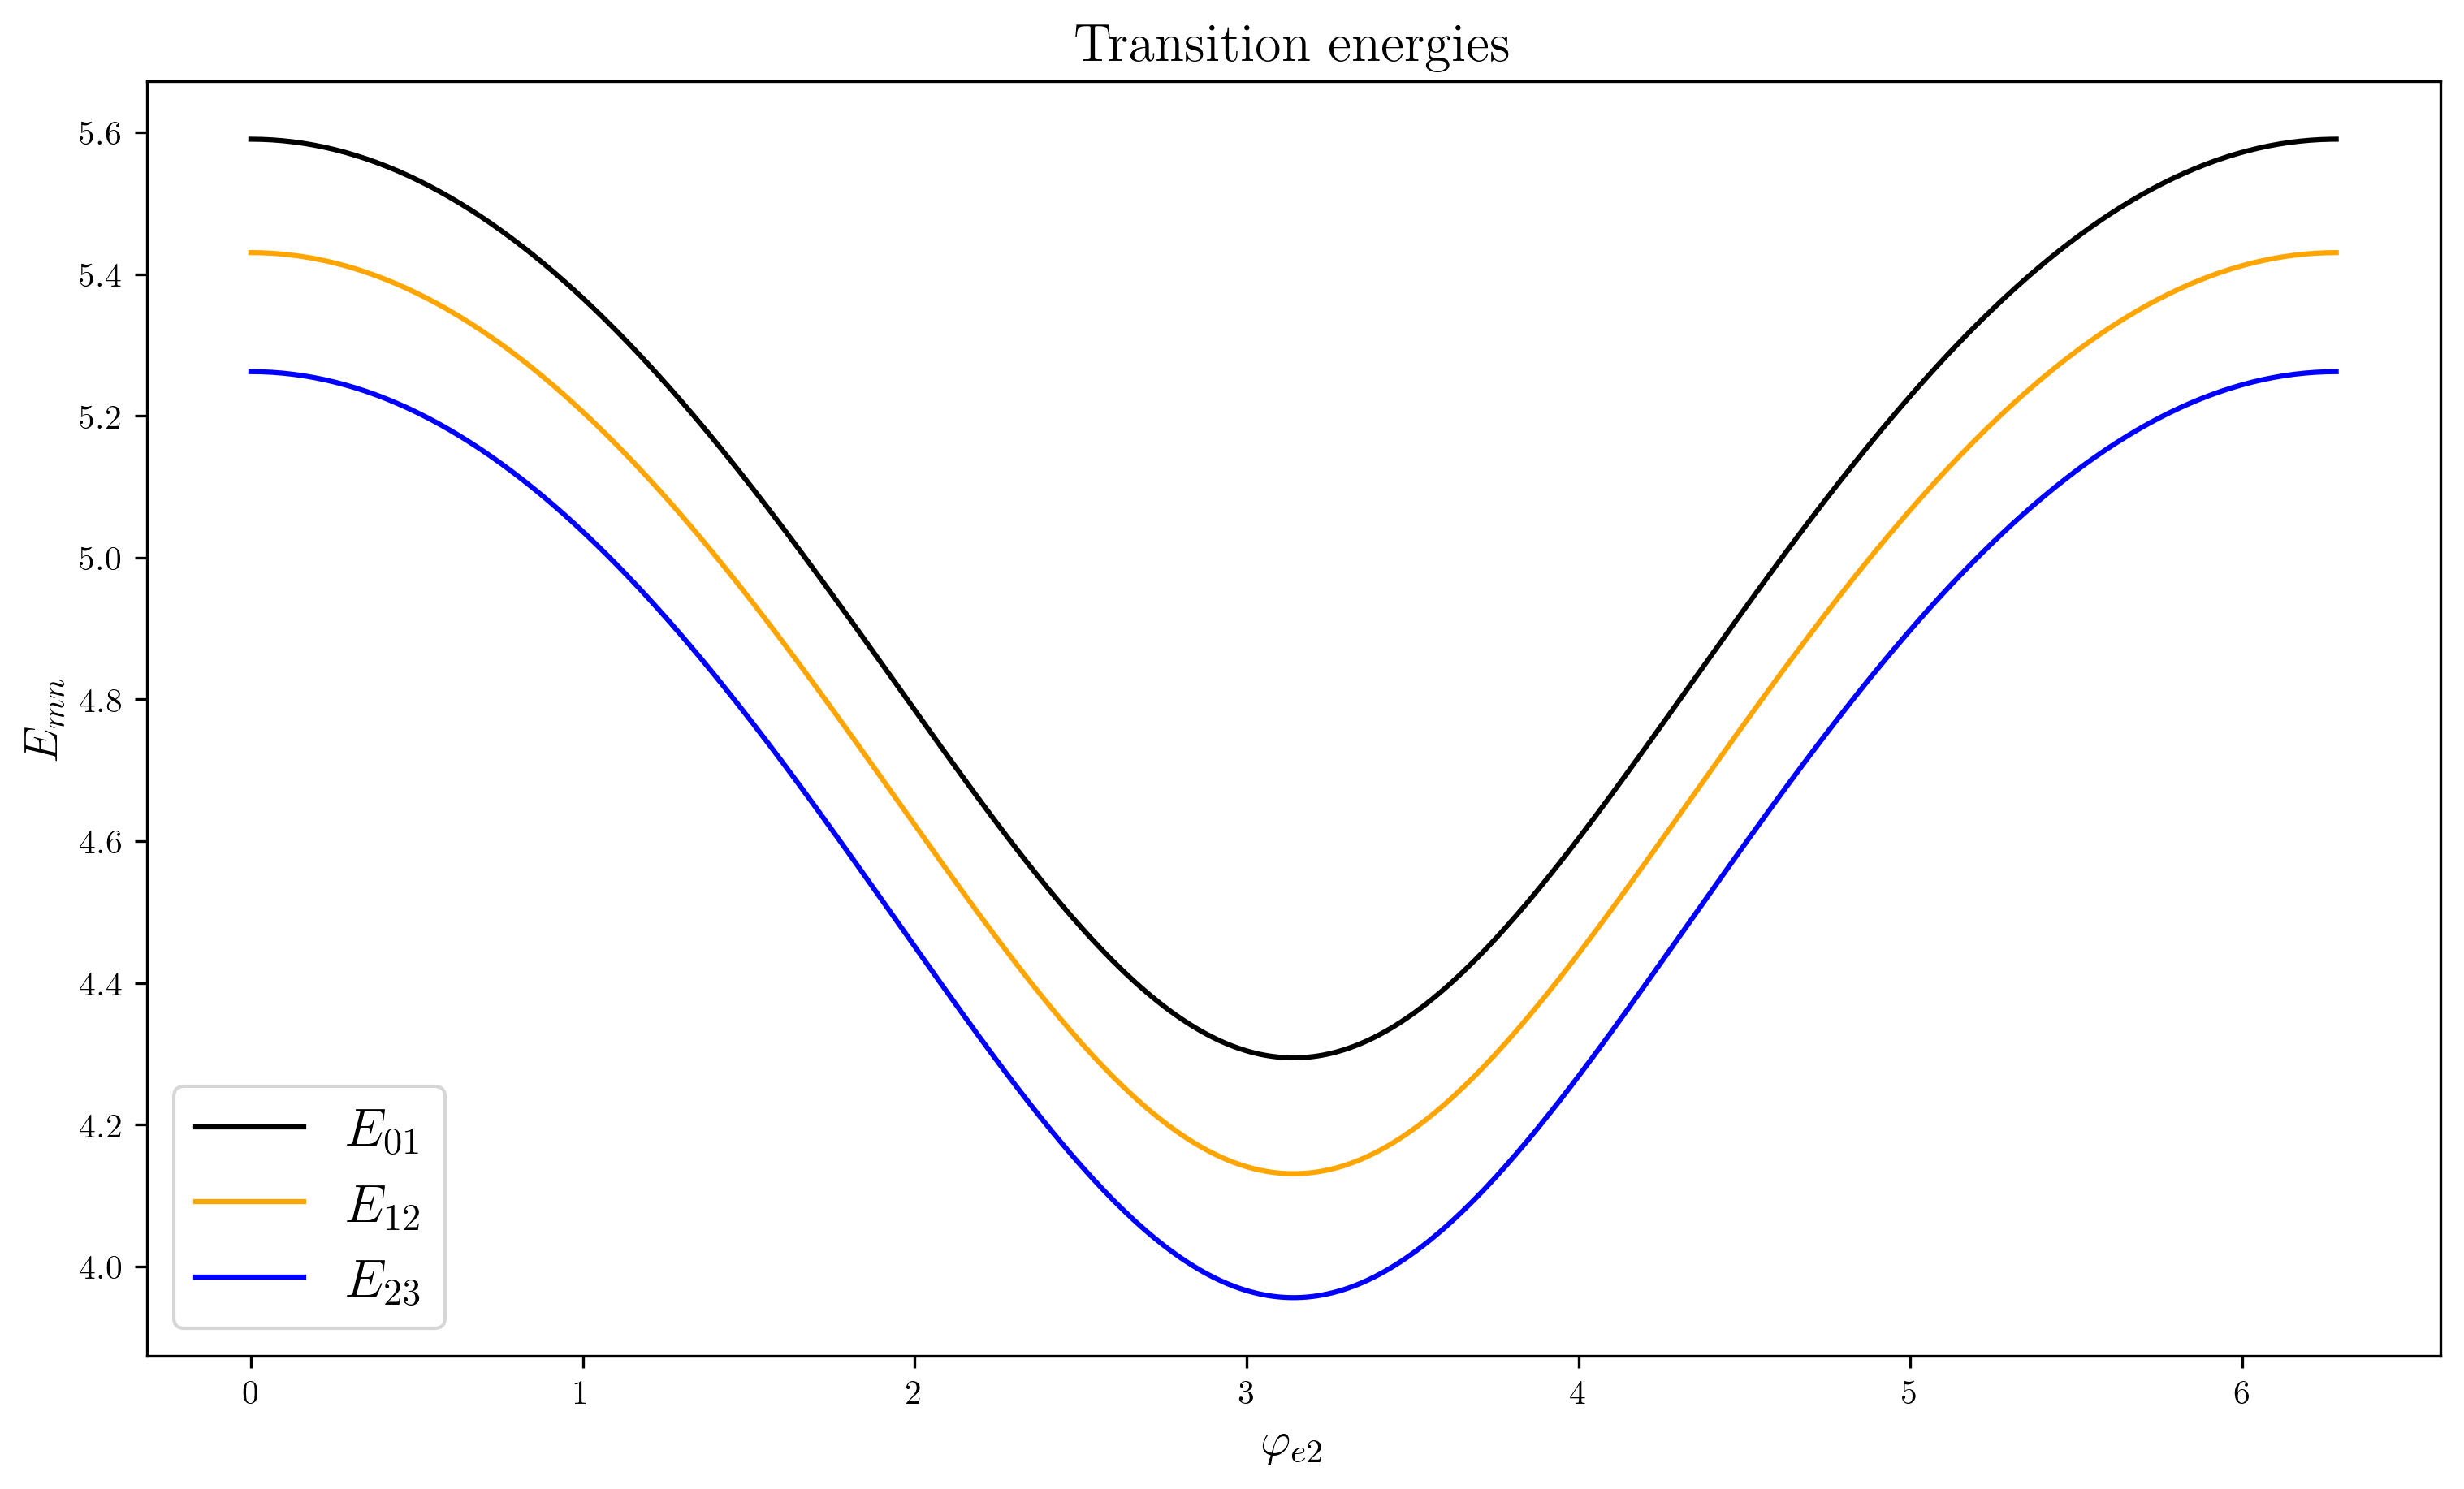

In [46]:
fig = plt.figure(figsize=(10, 6), layout='constrained', dpi=300)

plt.plot(phis_2, way_01, color='black', label="$E_{01}$")
plt.plot(phis_2, way_12, color='orange', label="$E_{12}$")
plt.plot(phis_2, way_23, color='blue', label="$E_{23}$")

plt.xlabel("$\\varphi_{e2}$", fontsize=14)
plt.ylabel("$E_{mn}$", fontsize=14)
plt.title("Transition energies", fontsize=16)

plt.legend(fontsize=16)

plt.show()

# Lets get eigenstates with respect to certain external flux

In [47]:
# first 4 psi-functions of hamiltonian
first_state = []
second_state = []
third_state = []
fourth_state = []

# certain external flux
phi_e2 = np.pi * 3 / 2

# count of charge states
L = 1001

# eigenvalues of charge states
ns = np.linspace(-1, 1, L)
        
diagonals = np.zeros((3, L), dtype = 'complex_')

# main diagonal of the matrix above
diagonals[1] = EC_4 * ns**2

# low and top diags of the matrix above
diagonals[0, :] = -(EJ1 + EJ2 * np.exp(-1j * phi_e2)) / 2
diagonals[2, :] = -(EJ1 + EJ2 * np.exp(1j * phi_e2)) / 2

res_sp = spdiags(diagonals, [-1, 0, 1], L, L).toarray()

# getting eigenvalues and eigenvectors of the matrix above
w, v = eigh(res_sp)

# getting i-th eigenstate; v.T because the eigenstate is in the column
first_state.append(v.T[0])
second_state.append(v.T[1])
third_state.append(v.T[2])
fourth_state.append(v.T[3])

# Lets plot the eigenstates

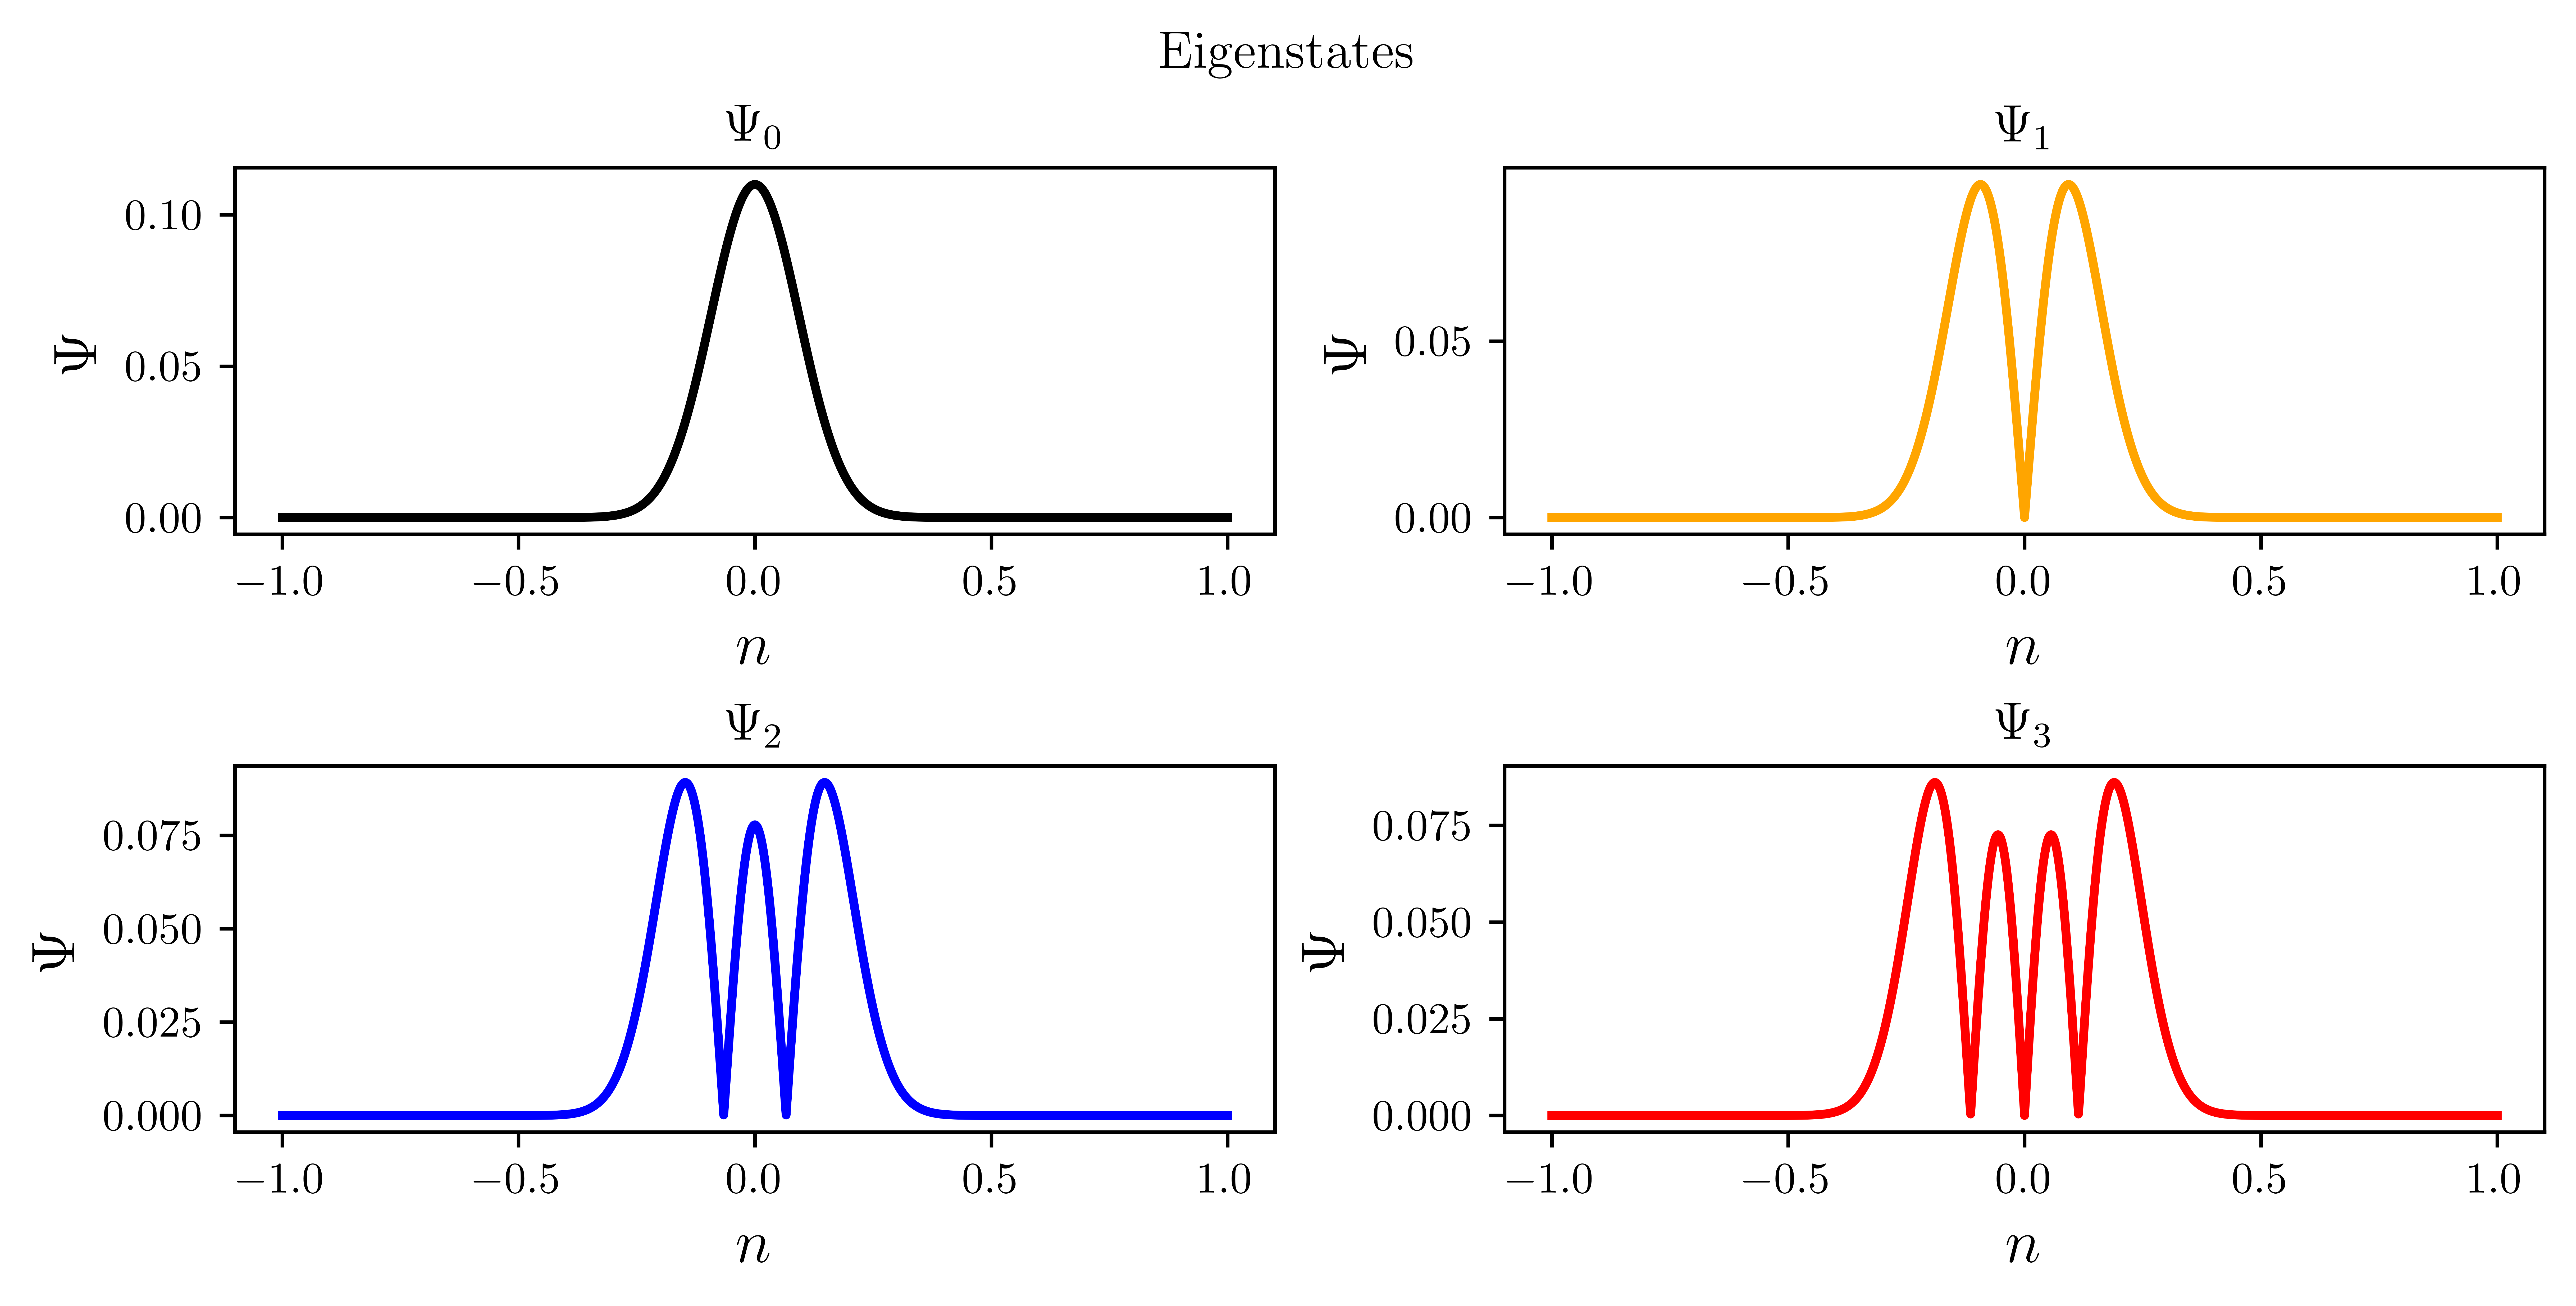

In [48]:
width = 2
height = 2
dpi = 1200

ppr = height * dpi / 400
ppc = width * dpi / 200

mosaic = """
    AB
    CD
    """

fig = plt.figure(figsize=(4 * ppc * 200 / dpi, 2 * ppr * 400 / dpi), layout='constrained', dpi=dpi)

ax_dict = fig.subplot_mosaic(mosaic)

cur = ax_dict['A']
cur.plot(ns, np.abs(first_state[0]), color='black', lw=2)
cur.set_xlabel("$n$", fontsize=14)
cur.set_ylabel("$\\Psi$", fontsize=14)
cur.set_title("$\\Psi_0$")

cur = ax_dict['B']
cur.plot(ns, np.abs(second_state[0]), color='orange', lw=2)
cur.set_xlabel("$n$", fontsize=14)
cur.set_ylabel("$\\Psi$", fontsize=14)
cur.set_title("$\\Psi_1$")

cur = ax_dict['C']
cur.plot(ns, np.abs(third_state[0]), color='blue', lw=2)
cur.set_xlabel("$n$", fontsize=14)
cur.set_ylabel("$\\Psi$", fontsize=14)
cur.set_title("$\\Psi_2$")

cur = ax_dict['D']
cur.plot(ns, np.abs(fourth_state[0]), color='red', lw=2)
cur.set_xlabel("$n$", fontsize=14)
cur.set_ylabel("$\\Psi$", fontsize=14)
cur.set_title("$\\Psi_3$")

plt.suptitle("Eigenstates")

plt.show()